In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (16.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120874 files and direc

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns


pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000
plt.rc('font', family='NanumBarunGothic')

## 1. 데이터 불러오기

* 서울시 25개 자치구들을 대상으로 1인가구와 나머지 독립변수간의 상관관계 분석을 할 예정이다.

* 종속변수는 '1인가구'이다.
* 독립변수로는 '인구 밀도', '고령인구수', '여성인구비', '5대 범죄발생 수', '범죄율', '유흥업소비', '치안시설비', 'cctv', '아파트 비율', '단독주택 비율', '연립/다세대 비율', '비거주용 주거 비율'이 있다.

* 가설: 1인가구일수록 높은 확률로 범죄에 취약할 것이다.


In [4]:
d = pd.read_excel('/content/drive/MyDrive/GoH project/검증 데이터 만들기/전처리 완료한 엑셀 결과물/너때문에 죽겠다 다신 만나지 말자.xlsx')
df = d.iloc[:,1:] # 지역구 이름만 뺀 것
df1 = d.iloc[1:, 1:] # 서울시전체 제외 차치구
# df2 = df1 # 여성인구비 로그값 취한거
# d.sort_values(by=['cctv','치안시설비'])
d

,시군구,1인가구,인구 밀도,고령인구수,여성인구비,5대 범죄발생 수,범죄율,유흥업소비,치안시설비,cctv,아파트 비율,단독주택 비율,연립/다세대 비율,비거주용 주거 비율
0,서울특별시,14.02,11.27,16.06,512.94,13.06,3.85,8.58,10.04,10.76,46.50,28.21,23.11,2.18
1,종로구,10.14,10.36,12.06,512.70,9.71,0.50,6.62,8.72,7.41,25.70,42.63,28.64,3.03
2,중구,9.94,11.11,11.88,510.24,9.78,0.57,6.34,8.86,7.75,50.25,29.12,17.12,3.50
3,용산구,10.44,10.86,12.38,516.20,9.62,0.41,9.15,9.80,6.50,38.70,37.81,22.11,1.38
4,성동구,10.61,11.42,12.54,510.95,9.36,0.15,9.45,9.84,0.00,56.43,31.21,9.77,2.59
5,광진구,10.94,11.52,12.62,516.12,9.81,0.60,10.16,10.24,6.22,22.24,46.69,27.88,3.19
6,동대문구,10.93,11.70,12.84,504.09,9.74,0.53,8.73,9.72,7.52,45.75,37.82,13.41,3.02
7,중랑구,10.80,11.60,12.94,505.31,9.86,0.65,10.02,10.02,8.11,33.84,41.12,22.67,2.37
8,성북구,10.92,11.40,13.02,516.10,9.52,0.31,10.88,9.79,8.13,44.77,33.52,19.26,2.45
9,강북구,10.62,11.10,12.86,512.42,9.63,0.42,8.42,9.95,6.95,26.94,37.58,33.79,1.69


In [5]:
# df2['여성인구비_로그'] = np.log(df2['여성인구비']).round(2)
# df2 = df2[['1인가구', '인구 밀도', '고령인구수', '여성인구비_로그', '5대 범죄발생 수', '범죄율', '유흥업소비', '치안시설비',
#        'cctv', '아파트 비율', '단독주택 비율', '연립/다세대 비율', '비거주용 주거 비율']]
# df2

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 1 to 25
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   1인가구        25 non-null     float64
 1   인구 밀도       25 non-null     float64
 2   고령인구수       25 non-null     float64
 3   여성인구비       25 non-null     float64
 4   5대 범죄발생 수   25 non-null     float64
 5   범죄율         25 non-null     float64
 6   유흥업소비       25 non-null     float64
 7   치안시설비       25 non-null     float64
 8   cctv        25 non-null     float64
 9   아파트 비율      25 non-null     float64
 10  단독주택 비율     25 non-null     float64
 11  연립/다세대 비율   25 non-null     float64
 12  비거주용 주거 비율  25 non-null     float64
dtypes: float64(13)
memory usage: 2.7 KB


## 2. EDA

### 2.1 연속형 자료의 탐색

#### 1) 평균과 중위수
* 평균(mean)과 중위수(50%)의 차이가 크지 않은지 확인해야한다.
  왜냐하면 평균과 중위수가 일치할수록 이상치가 적은 데이터를 의미하기 때문이다.
    

📍 결과: 대체적으로 평이하며 이상치가 없을 확률이 크다. (아파트 비율, 단독주택 비율에서는 약간의 차이를 보임)

In [7]:
df1.describe()

,1인가구,인구 밀도,고령인구수,여성인구비,5대 범죄발생 수,범죄율,유흥업소비,치안시설비,cctv,아파트 비율,단독주택 비율,연립/다세대 비율,비거주용 주거 비율
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,10.745200,11.300800,12.794400,512.412400,9.801600,0.591200,8.956400,10.004000,7.070000,45.462800,29.406000,22.940400,2.190800
std,0.348833,0.316464,0.336441,7.626067,0.278488,0.278528,1.162128,0.430968,1.620429,13.597231,10.281357,7.454385,1.055501
min,9.940000,10.360000,11.880000,494.090000,9.260000,0.050000,6.340000,8.720000,0.000000,22.240000,10.750000,8.870000,0.910000
25%,10.610000,11.170000,12.720000,507.470000,9.620000,0.410000,8.390000,9.850000,6.820000,34.780000,21.840000,19.260000,1.530000
50%,10.800000,11.340000,12.860000,512.700000,9.780000,0.570000,8.990000,10.060000,7.480000,47.270000,31.040000,22.810000,2.040000
75%,10.940000,11.510000,13.010000,516.620000,9.970000,0.760000,9.450000,10.260000,7.750000,54.140000,37.580000,27.880000,2.450000
max,11.630000,11.800000,13.220000,527.630000,10.470000,1.260000,11.610000,10.680000,8.730000,79.470000,47.700000,40.540000,5.950000


#### 2) 왜도와 첨도
* 필요성: 정규분포와 유사한지 검토하기 위해서, 왜도와 첨도를 살펴보는 것이 좋다.


#### (1) 왜도
* 0일 경우, 정규분포와 일치하여 좌우가 대칭된 형태이다.
* 2보다 클 경우, 어느 한쪽으로 치우쳐져 있다는 의미이다.
* 음수(-)이면, 오른쪽에 자료가 더 많고 이상치는 작은 값들이 있다는 뜻이다.
* 양수(+)이면, 왼쪽에 자료가 더 많고 이상치는 큰 값이 많다고 볼 수 있다.

#### 📍 결과
* cctv에서 이상치가 작은 값이 있을 가능성이 크다.

In [8]:
df1.skew()

1인가구         -0.014094
인구 밀도        -1.176722
고령인구수        -1.233692
여성인구비        -0.488909
5대 범죄발생 수     0.280021
범죄율           0.284540
유흥업소비        -0.101943
치안시설비        -1.746328
cctv         -3.654042
아파트 비율        0.207547
단독주택 비율       0.007542
연립/다세대 비율     0.029465
비거주용 주거 비율    1.890710
dtype: float64

#### (2) 첨도

* 0이면, 정규분포의 높이와 동일합니다.
* 값이 클수록 중심에 자료가 많이 몰려 있다는 의미입니다.

#### 📍 결과
* cctv, 비주거용 주거 비율, 치안시설비의 자료는 중심에 몰려있을 것이다.

In [9]:
df1.kurtosis()

1인가구           1.244733
인구 밀도          2.278437
고령인구수          1.476348
여성인구비          0.413444
5대 범죄발생 수      0.216767
범죄율            0.216630
유흥업소비          0.958020
치안시설비          3.948208
cctv          16.110108
아파트 비율         0.222334
단독주택 비율       -0.922587
연립/다세대 비율      0.308239
비거주용 주거 비율     5.814748
dtype: float64

#### (3) 히스토그램
* matplotlib.pyplot: 도표와 그래프를 표시해주는 라이브러리
* 파라미터: bins(구간너비), figsize(도표 크기)

📍결과
1. cctv에 0 값을 가진 구 확인 필요 (이상치 처리를 어떻게 할지 고민)
2. 비거주 주거 비율이 5 이상인 구를 확인 필요
3. 치안시설비에 9 이하의 자료에 대한 확인 필요

array([[<Axes: title={'center': '1인가구'}>,
        <Axes: title={'center': '인구 밀도'}>,
        <Axes: title={'center': '고령인구수'}>,
        <Axes: title={'center': '여성인구비'}>],
       [<Axes: title={'center': '5대 범죄발생 수'}>,
        <Axes: title={'center': '범죄율'}>,
        <Axes: title={'center': '유흥업소비'}>,
        <Axes: title={'center': '치안시설비'}>],
       [<Axes: title={'center': 'cctv'}>,
        <Axes: title={'center': '아파트 비율'}>,
        <Axes: title={'center': '단독주택 비율'}>,
        <Axes: title={'center': '연립/다세대 비율'}>],
       [<Axes: title={'center': '비거주용 주거 비율'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48128 (\N{HANGUL SYLLABLE MIL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, *

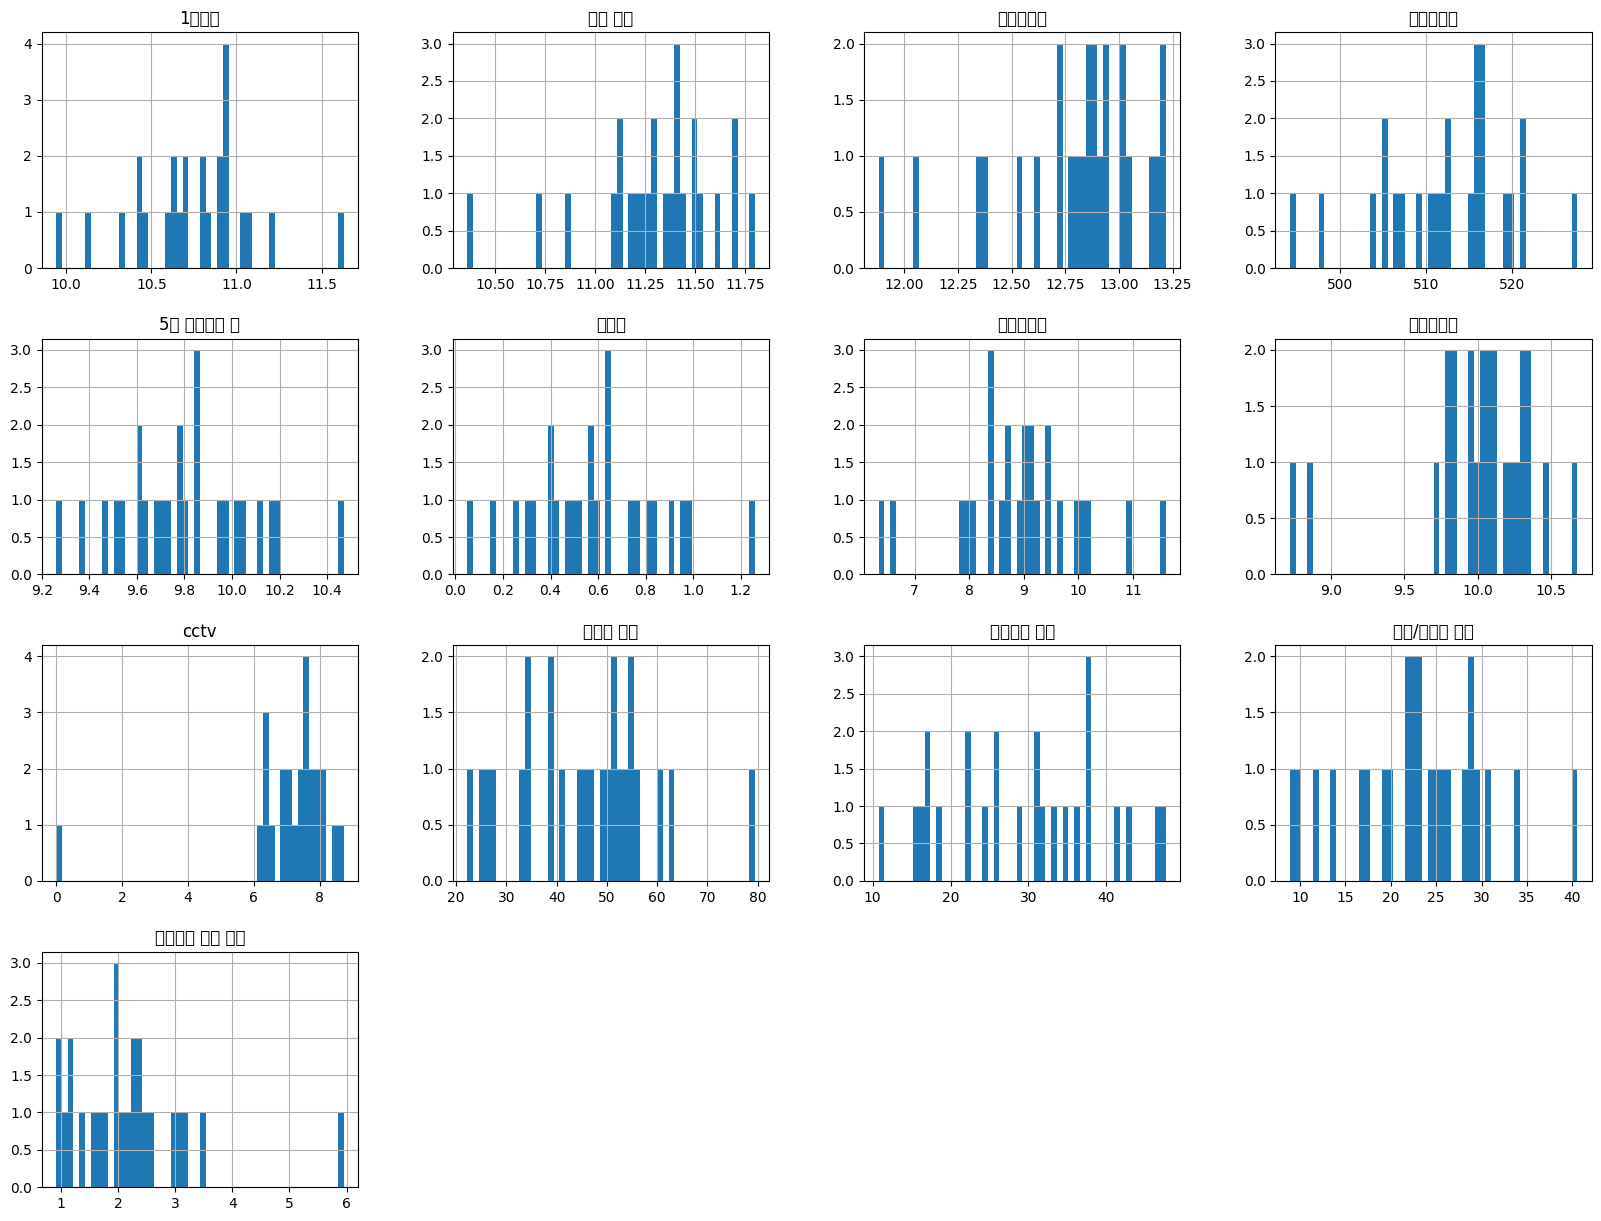

In [10]:

df1.hist(bins=50, figsize=(20,15))

#### 📐 데이터 뜯어보기

#### 1. cctv에 0 값을 가진 구 확인 필요 (이상치 처리를 어떻게 할지 고민)
방범용 cctv가 0개인 구는 성동구이다.

In [11]:
d[d['cctv']==0]

,시군구,1인가구,인구 밀도,고령인구수,여성인구비,5대 범죄발생 수,범죄율,유흥업소비,치안시설비,cctv,아파트 비율,단독주택 비율,연립/다세대 비율,비거주용 주거 비율
4,성동구,10.61,11.42,12.54,510.95,9.36,0.15,9.45,9.84,0.0,56.43,31.21,9.77,2.59


#### 2. 비거주 주거 비율이 5 이상인 구를 확인 필요
비거주용 주거 비율이 가장 높은 구는 관악구이다.

In [12]:
d[d['비거주용 주거 비율'] >=5]

,시군구,1인가구,인구 밀도,고령인구수,여성인구비,5대 범죄발생 수,범죄율,유흥업소비,치안시설비,cctv,아파트 비율,단독주택 비율,연립/다세대 비율,비거주용 주거 비율
21,관악구,11.63,11.34,13.05,498.01,10.12,0.91,7.83,10.2,8.44,24.68,47.7,21.67,5.95


#### 3. 치안시설비에 9 이하의 자료에 대한 확인 필요
치안시설비가 9개 이하인 곳은 종로구, 중구이다. 서울특별시 자치구들 중에서 상대적으로 치안시설비가 적다.

In [13]:
d[d['치안시설비']<=9]

,시군구,1인가구,인구 밀도,고령인구수,여성인구비,5대 범죄발생 수,범죄율,유흥업소비,치안시설비,cctv,아파트 비율,단독주택 비율,연립/다세대 비율,비거주용 주거 비율
1,종로구,10.14,10.36,12.06,512.70,9.71,0.50,6.62,8.72,7.41,25.70,42.63,28.64,3.03
2,중구,9.94,11.11,11.88,510.24,9.78,0.57,6.34,8.86,7.75,50.25,29.12,17.12,3.50


### 2-2.이변량 데이터 탐색
#### 1) 상관계수
* 피어슨(pearson)
* 스피어만(spearman)
* 켄달(kendall)

어떤 상관계수를 사용할지는 분석하려는 데이터의 특성과 목적에 따라 다릅니다.

피어슨 상관계수는 선형 관계를 가정하며 연속형 변수에 사용됩니다. 스피어만과 켄달 순위 상관계수는 비선형적인 상관관계나 순위 데이터에 사용됩니다.

따라서 피어슨 상관계수를 사용하겠습니다.

📍결과
* 1인가구(종속변수)는 '인구밀도', '고령인구수', '여성인구비', '5대 범죄발생수', '범죄율', '유흥업소비', '치안시설비', '비거주용 주거 비율', '단독주택 비율'과 유의미한 상관관계가 있다.

In [14]:
pd.DataFrame(df1.corr(method="pearson"))

,1인가구,인구 밀도,고령인구수,여성인구비,5대 범죄발생 수,범죄율,유흥업소비,치안시설비,cctv,아파트 비율,단독주택 비율,연립/다세대 비율,비거주용 주거 비율
1인가구,1.000000,0.353131,0.742978,0.041046,0.521678,0.521369,0.150819,0.606914,0.195699,-0.035032,0.038727,-0.033218,0.309144
인구 밀도,0.353131,1.000000,0.437603,-0.285877,-0.114617,-0.114644,0.550633,0.486586,-0.126055,0.047832,-0.015630,-0.059178,-0.044871
고령인구수,0.742978,0.437603,1.000000,0.158585,0.352841,0.351210,0.455226,0.804671,0.188333,0.285722,-0.425345,0.101089,-0.250200
여성인구비,0.041046,-0.285877,0.158585,1.000000,0.122300,0.121002,0.137557,0.136952,-0.051483,0.256639,-0.400014,0.128984,-0.321226
5대 범죄발생 수,0.521678,-0.114617,0.352841,0.122300,1.000000,0.999974,-0.307886,0.175992,0.486358,0.234398,-0.269639,-0.083733,0.197255
범죄율,0.521369,-0.114644,0.351210,0.121002,0.999974,1.000000,-0.307526,0.175773,0.485689,0.235720,-0.268929,-0.087253,0.198163
유흥업소비,0.150819,0.550633,0.455226,0.137557,-0.307886,-0.307526,1.000000,0.542943,-0.224392,0.211427,-0.210263,-0.034585,-0.430402
치안시설비,0.606914,0.486586,0.804671,0.136952,0.175992,0.175773,0.542943,1.000000,-0.018579,0.274997,-0.411460,0.117752,-0.364530
cctv,0.195699,-0.126055,0.188333,-0.051483,0.486358,0.485689,-0.224392,-0.018579,1.000000,-0.122095,-0.009076,0.223198,0.084580
아파트 비율,-0.035032,0.047832,0.285722,0.256639,0.234398,0.235720,0.211427,0.274997,-0.122095,1.000000,-0.847822,-0.588423,-0.468456


In [15]:
pd.DataFrame(df1.corr(method="pearson").iloc[:,0]).T

,1인가구,인구 밀도,고령인구수,여성인구비,5대 범죄발생 수,범죄율,유흥업소비,치안시설비,cctv,아파트 비율,단독주택 비율,연립/다세대 비율,비거주용 주거 비율
1인가구,1.0,0.353131,0.742978,0.041046,0.521678,0.521369,0.150819,0.606914,0.195699,-0.035032,0.038727,-0.033218,0.309144


#### 2) 산점도(Scatter plot)
1. 1인가구 & 고령인구수

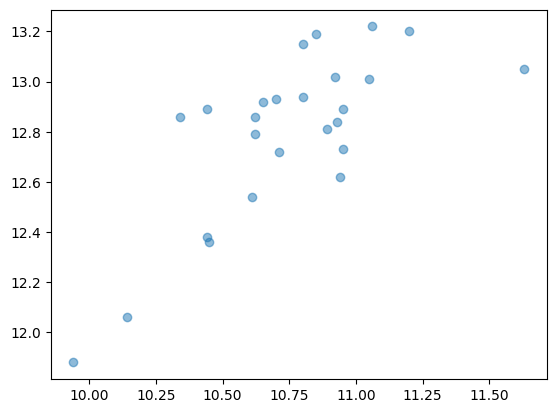

In [16]:
import matplotlib.pyplot as plt
plt.scatter(df1['1인가구'], df1['고령인구수'], alpha=0.5)
plt.show()

2. 1인가구 & 범죄율

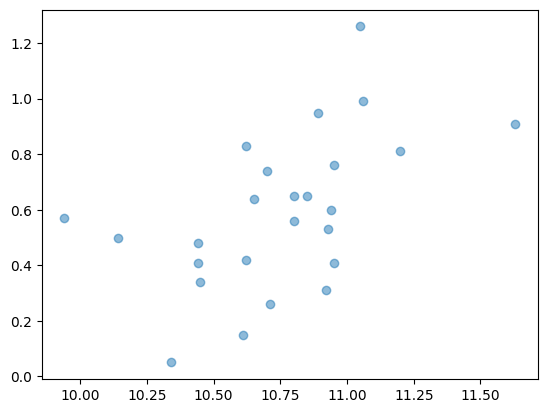

In [17]:
plt.scatter(df1['1인가구'], df1['범죄율'], alpha=0.5)
plt.show()

3. 1인가구 & 치안시설비

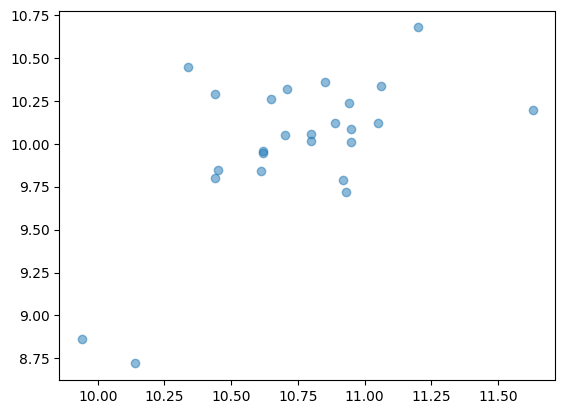

In [18]:
plt.scatter(df1['1인가구'], df1['치안시설비'], alpha=0.5)
plt.show()

4. 1인가구 & 비거주용 주거 비율

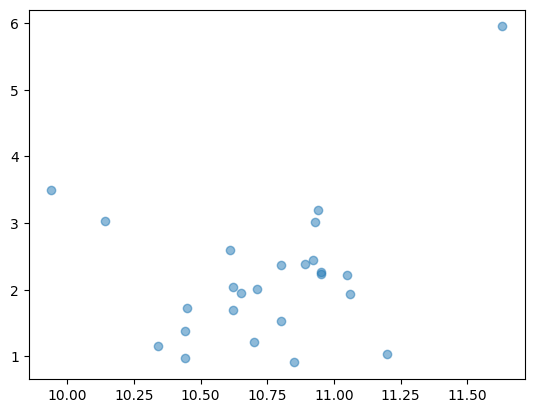

In [19]:
plt.scatter(df1['1인가구'], df1['비거주용 주거 비율'], alpha=0.5)
plt.show()

### 2-3. 중간 정리
* 이상치:방법용 cctv가 0개인 곳은 성동구이고, 관악구는 비거주용 주거 비율이 가장 높다. 그리고 종로구와 중구에서 서울시의 모든 자치구 대비 치안설비가 가장 낮았다.
* 결측치: 없음
* 1인가구와 가장 상관성이 높았던 변수는 고령인구수, 치안시설비, 5대범죄발생수, 범죄율, 인구밀도, 비거주용 주거 비율, cctv, 유흥업소비, 여성인구비, 단독주택비율 순으로 높았다.
